C:\Users\kaurp\AppData\Local\Temp\ipykernel_3508\3313981729.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




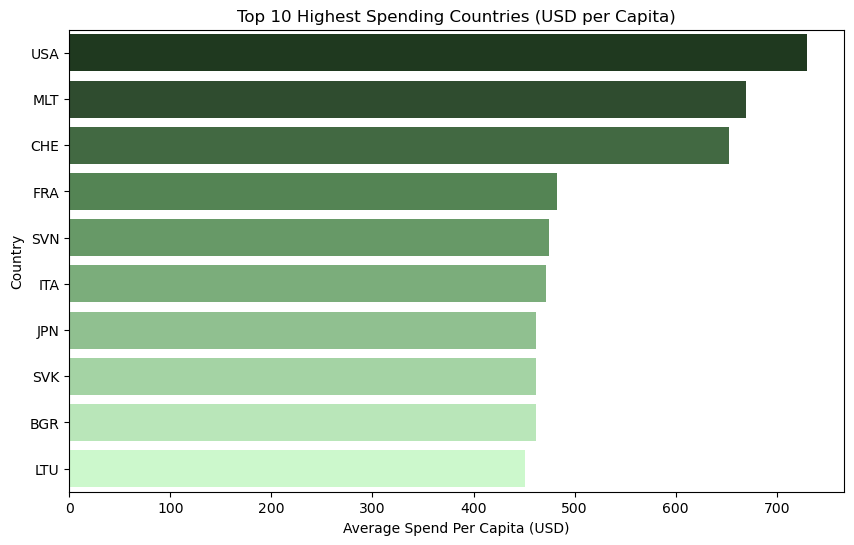

C:\Users\kaurp\AppData\Local\Temp\ipykernel_3508\3313981729.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




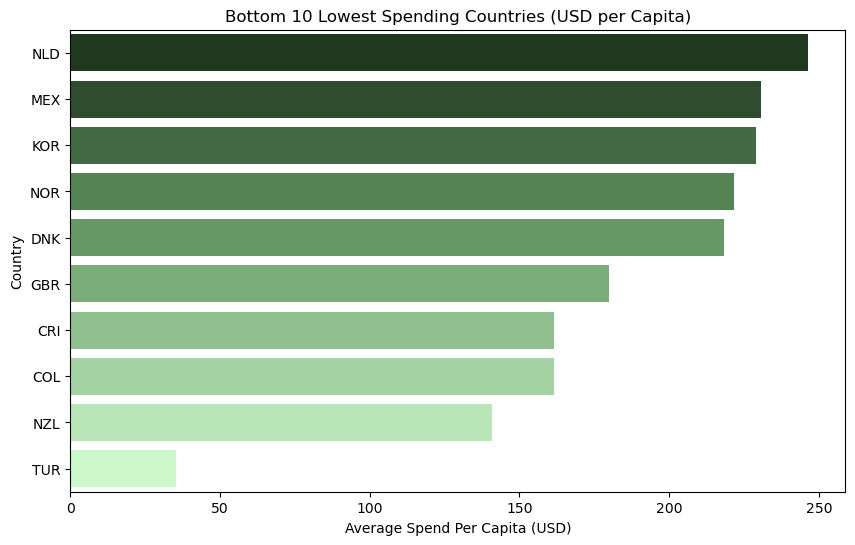

C:\Users\kaurp\AppData\Local\Temp\ipykernel_3508\3313981729.py:63: UserWarning:


The palette list has fewer values (10) than needed (906) and will cycle, which may produce an uninterpretable plot.



Intercept: -24.71452145800521
Coefficient: 295.8200311469281


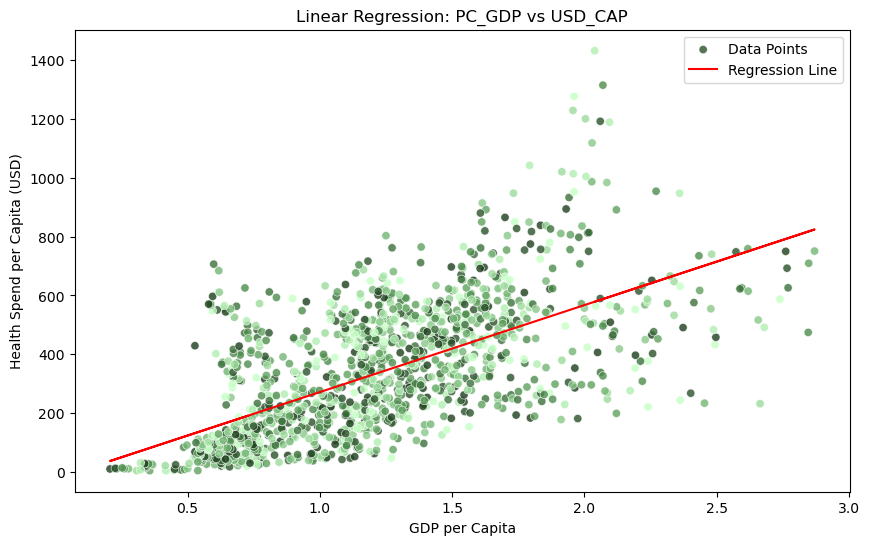

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Calculate Average Spend Per Capita by Location
avg_spend = data.groupby('LOCATION')['USD_CAP'].mean().reset_index()
avg_spend = avg_spend.sort_values(by='USD_CAP', ascending=False)

# Top 10 and Bottom 10 Countries
top_10 = avg_spend.head(10)
bottom_10 = avg_spend.tail(10)


# Bar Chart for Top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
                                                             '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5'])
plt.title('Top 10 Highest Spending Countries (USD per Capita)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Bar Chart for Bottom 10
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_10, x='USD_CAP', y='LOCATION', palette=['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
                                                                '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5'])
plt.title('Bottom 10 Lowest Spending Countries (USD per Capita)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()


# Example: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare Data
X = data[['PC_GDP']].dropna()  # Predictor
y = data['USD_CAP'].dropna()  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))

# Use color scheme for scatter points
colors = ['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
          '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5']

# Scatter plot
sns.scatterplot(x=X['PC_GDP'], y=y, alpha=0.8, label='Data Points', 
                palette=colors, hue=X['PC_GDP'], legend=False)

# Regression line in red
plt.plot(X['PC_GDP'], model.predict(X), color='red', label='Regression Line')

# Labels and title
plt.title('Linear Regression: PC_GDP vs USD_CAP')
plt.xlabel('GDP per Capita')
plt.ylabel('Health Spend per Capita (USD)')
plt.legend()
plt.show()


# Pharmaceutical Spenders Per Capita: Graph 1 & 2
Data Aggregation: The data shows the top 10 countries based on USD per capita pharmaceutical spending (not total spending). The values are averaged across the years.
Visualization: A horizontal bar chart is used to show the spending values for each country. The x-axis represents the average spending per capita in USD, while the y-axis displays the country names. The graph includes interactive hover features that reveal precise spending values.

# Top 10 Pharmaceutical Spenders Per Capita: Graph 1
Key Observations: The USA leads significantly, with the highest per capita spending
Other high spenders include: 
     Malta (MLT) → A comparatively smaller economy country with high per capita spending.
     Switzerland (CHE) → Known for its robust healthcare system.
     France (FRA) and Italy (ITA) → Major European economies with steady healthcare investments.
     Slovenia (SVN) and Bulgaria (BGR) → Appear in the top 10, indicating high per capita spending, both from eastern europe.

# Bottom 10 Pharmaceutical Spenders Per Capita: Graph 2
Key Observations: The bottom 10 spenders show remarkably low pharmaceutical expenditure per capita, with some countries spending less than a fraction of the top spenders. This reflects limited healthcare investment or restricted access to costly treatments.
The spending gradually increases from the lowest spender to the 10th lowest, but the difference between them is relatively small.

# Linear Regression – GDP per Capita vs Health Spending per capita: Graph 3
Data Preparation: The dataset uses GDP per capita (PC_GDP) as the independent variable and pharmaceutical spending per capita (USD_CAP) as the dependent variable and split into training and testing sets (80/20 split) for regression modeling.
Linear Regression Model: A regression line is fitted to the data, showing the relationship between GDP and pharmaceutical spending.The scatter plot displays individual data points, while the regression line highlights the overall trend and interactive features allow for detailed exploration of country-specific data points.

Key Observations: It shows a positive relationship between GDP per capita and pharmaceutical spending—higher GDP generally leads to higher spending.
Outliers Present: A few countries deviate significantly from the trend, indicating outliers with either disproportionately high or low spending relative to their GDP

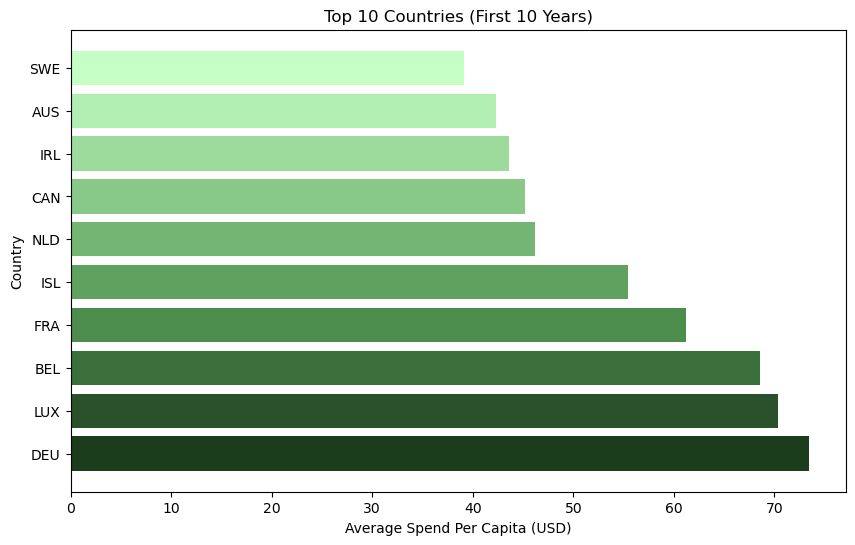

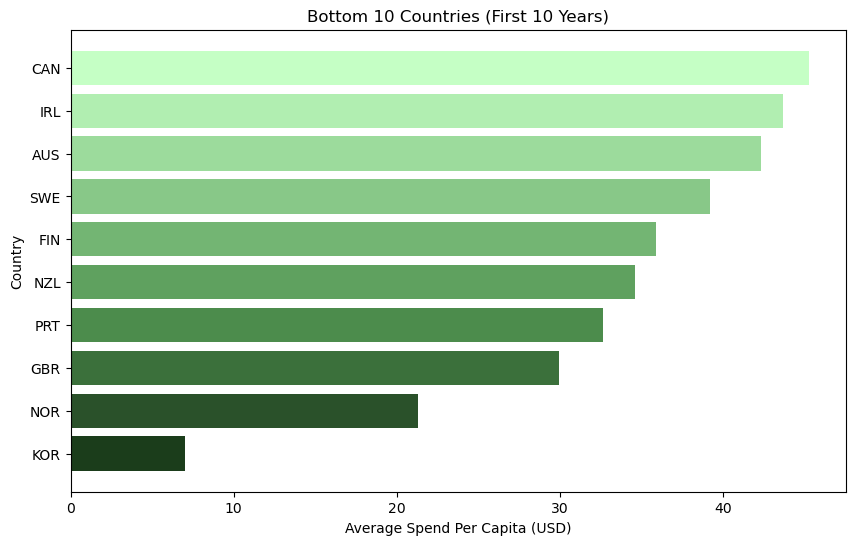

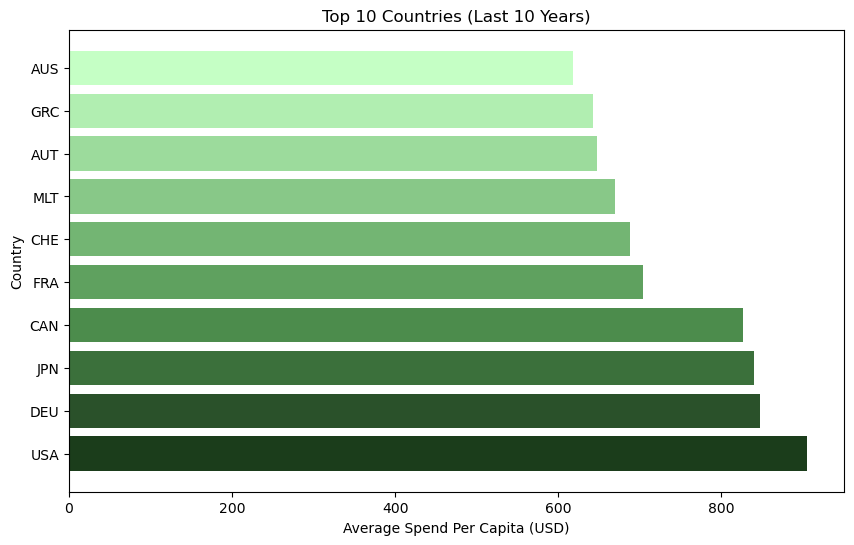

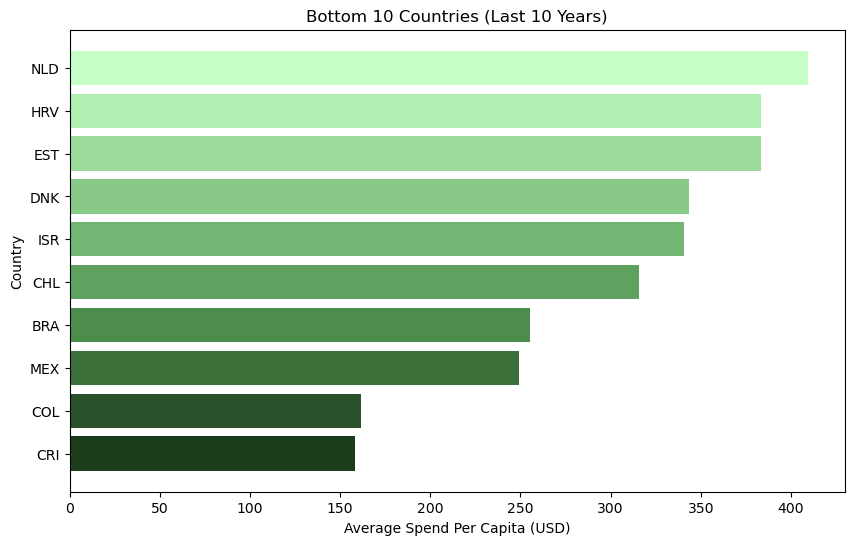

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Divide into first 10 years and last 10 years
first_10_years = data[data['TIME'].between(data['TIME'].min(), data['TIME'].min() + 9)]
last_10_years = data[data['TIME'].between(data['TIME'].max() - 9, data['TIME'].max())]

# Group by LOCATION and calculate average USD_CAP for each period
first_avg_spend = first_10_years.groupby('LOCATION')['USD_CAP'].mean().reset_index()
last_avg_spend = last_10_years.groupby('LOCATION')['USD_CAP'].mean().reset_index()

# Detect and Handle Outliers
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

first_avg_spend = handle_outliers(first_avg_spend, 'USD_CAP')
last_avg_spend = handle_outliers(last_avg_spend, 'USD_CAP')

# Rank Top 10 and Bottom 10
first_top_10 = first_avg_spend.nlargest(10, 'USD_CAP')
first_bottom_10 = first_avg_spend.nsmallest(10, 'USD_CAP')

last_top_10 = last_avg_spend.nlargest(10, 'USD_CAP')
last_bottom_10 = last_avg_spend.nsmallest(10, 'USD_CAP')

# Define consistent green color scheme
colors = ['#1b3d1b', '#2a512a', '#3b703b', '#4c8c4c', '#5fa15f', 
          '#73b573', '#88c888', '#9cdb9c', '#b1eeb1', '#c5ffc5']

# Plot Results with consistent color scheme
# First 10 years - Top 10
plt.figure(figsize=(10, 6))
plt.barh(first_top_10['LOCATION'], first_top_10['USD_CAP'], color=colors[:10])
plt.title('Top 10 Countries (First 10 Years)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# First 10 years - Bottom 10
plt.figure(figsize=(10, 6))
plt.barh(first_bottom_10['LOCATION'], first_bottom_10['USD_CAP'], color=colors[:10])
plt.title('Bottom 10 Countries (First 10 Years)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Last 10 years - Top 10
plt.figure(figsize=(10, 6))
plt.barh(last_top_10['LOCATION'], last_top_10['USD_CAP'], color=colors[:10])
plt.title('Top 10 Countries (Last 10 Years)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Last 10 years - Bottom 10
plt.figure(figsize=(10, 6))
plt.barh(last_bottom_10['LOCATION'], last_bottom_10['USD_CAP'], color=colors[:10])
plt.title('Bottom 10 Countries (Last 10 Years)')
plt.xlabel('Average Spend Per Capita (USD)')
plt.ylabel('Country')
plt.show()

# Top 10 vs Bottom 10 Spenders – First 10 Years vs Last 10 Years
Data Preparation: The dataset is divided into two time periods, First 10 years (earliest years in the dataset) and Last 10 years (most recent years).The data is grouped by country (LOCATION) and the average spending per capita (USD_CAP) is calculated for both periods. The Outliers are handled using the Interquartile Range (IQR) method to avoid skewed results. Values below the lower bound or above the upper bound are capped.

Visualization: Four bar charts are generated: Top 10 spenders and bottom 10 spenders for both the first and last 10 years. The The graphs highlight the spending trends over time.

Key Observations: 
 Increased Spending Over Time: The top 10 spenders in the last 10 years show higher spending per capita compared to the first 10 years, indicating increased pharmaceutical investment. This suggests rising drug costs or improved healthcare access over time.
 Top & Bottom 10 Consistency:The top 10 spenders show some consistency, with four countries (Australia, Germany, France, and Canada) appearing in both periods.There is no overlap in the bottom 10 spenders, confirming that the lowest-spending countries vary significantly between the two periods. So it could be due to changing economic factors or changing healthcare investments in low spending countries 
 Rising Pharmaceutical Costs Over Time: The last 10 years show generally higher average spending for both top and bottom spenders compared to the first 10 years, indicating inflation or increased healthcare investment over time.

In [8]:
from scipy.stats import zscore

# Compute Z-scores
data['Z_Score'] = zscore(data['USD_CAP'])  # Replace 'USD_CAP' with your desired column
outliers = data[(data['Z_Score'] > 3) | (data['Z_Score'] < -3)]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score
335       DEU  2021       13.866   1.793  1042.460     86728.58  3.114828
1332      USA  2013       11.975   1.915  1020.541    322552.13  3.017873
1333      USA  2014       12.527   2.029  1118.634    356157.77  3.451771
1334      USA  2015       12.707   2.095  1189.437    381498.83  3.764956
1335      USA  2016       12.263   2.060  1192.301    385198.78  3.777624
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259


# Z Score to identify Outliers:
The code calculates Z-scores for the 'USD_CAP' column and identifies outliers where the Z-score is above 3 or below -3.
zscore() computes how far each value is from the mean in terms of standard deviations. Outliers are selected if their Z-scores are greater than 3 or less than -3.
Key Observations: Z-Scores: All the rows listed have Z-scores above 3, indicating they are outliers (values significantly higher than the mean) 
These rows represent countries (like the USA) with exceptionally high USD capital expenditures relative to the dataset relative to the dataset's mean and standard deviation.

In [9]:
Q1 = data['USD_CAP'].quantile(0.25)  # Replace 'USD_CAP' with your column
Q3 = data['USD_CAP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['USD_CAP'] < lower_bound) | (data['USD_CAP'] > upper_bound)]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score
335       DEU  2021       13.866   1.793  1042.460     86728.58  3.114828
1333      USA  2014       12.527   2.029  1118.634    356157.77  3.451771
1334      USA  2015       12.707   2.095  1189.437    381498.83  3.764956
1335      USA  2016       12.263   2.060  1192.301    385198.78  3.777624
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259


# Interquartile Range (IQR) method to identify outliers:
Quantiles: Q1 (25th percentile) and Q3 (75th percentile) are computed.
IQR Calculation: IQR = Q3 - Q1, representing the spread of the middle 50% of the data
Outlier Bounds: Outliers are values outside the range defined by 1.5 * IQR below Q1 or above Q3. Rows with values outside these bounds are filtered and displayed.
Key Observations: 
Predicted Values: These are calculated based on model, offering estimates of 'USD_CAP'.
Comparison: The predicted values seem lower than the actual 'USD_CAP' values in most cases, suggesting potential underestimation by the model.

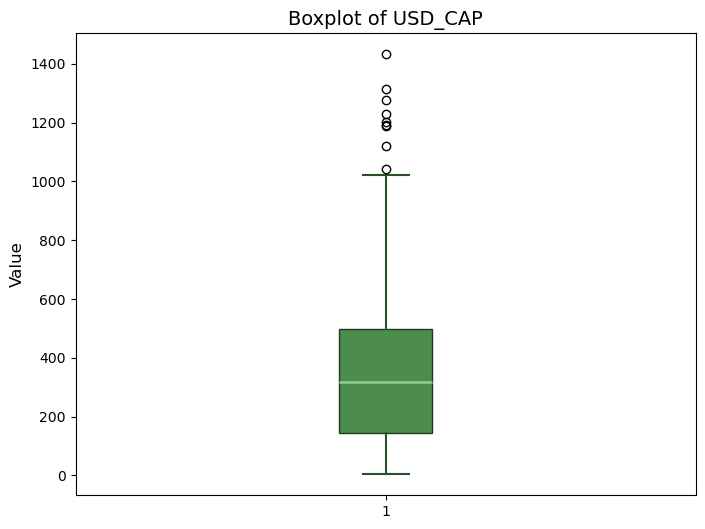

In [ ]:
import matplotlib.pyplot as plt

# Define the green color scheme
box_color = '#4c8c4c'  # Mid-tone green from the palette for a clean look

plt.figure(figsize=(8, 6))

# Customize boxplot with green colors
box = plt.boxplot(data['USD_CAP'], patch_artist=True)  # `patch_artist=True` fills the box with color

# Apply the green color scheme
for patch in box['boxes']:
    patch.set(facecolor=box_color)  # Box fill color
    patch.set(edgecolor='#1b3d1b')  # Box border color

# Customize other elements
for whisker in box['whiskers']:
    whisker.set(color='#2a512a', linewidth=1.5)

for cap in box['caps']:
    cap.set(color='#2a512a', linewidth=1.5)

for median in box['medians']:
    median.set(color='#88c888', linewidth=2)  # Median line color

# Titles and labels
plt.title('Boxplot of USD_CAP', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.show()


This code creates a boxplot for the 'USD_CAP' column A boxplot is generated to visualize the distribution, median and potential outliers of 'USD_CAP'

Key Observations: 
 Min and Lower Fence: 3.628, suggesting potential outliers below this value.
 Q1: Q1 is 144.52, which represents the 25th percentile of the data, indicating that 25% of the values fall below this threshold.
 Median: The median is 317.795, meaning that 50% of the values lie below this point, closer to Q1, indicating a slight lower skew
 Third Quartile (Q3): Q3 is 496.96, which means 75% of the values lie below this threshold. The interquartile range (IQR) is Q3 - Q1 = 352.44, indicating the spread of the middle 50% of the data.
 Upper Fence: The upper fence is 1020.541, which is the threshold for identifying high outliers. Values above this value are considered extreme.

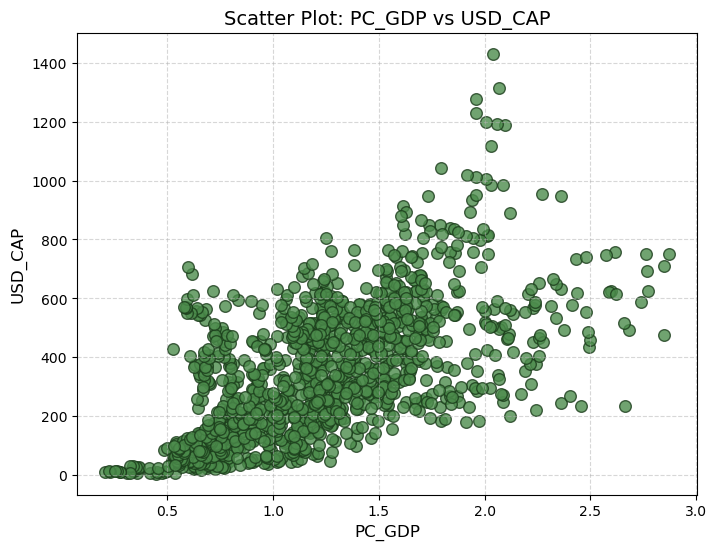

In [ ]:
import matplotlib.pyplot as plt

# Define the green color scheme
scatter_color = '#4c8c4c'   # Mid-tone green for the points
edge_color = '#1b3d1b'      # Dark green edges for contrast

plt.figure(figsize=(8, 6))

# Scatter plot with green color scheme
plt.scatter(data['PC_GDP'], data['USD_CAP'], color=scatter_color, edgecolor=edge_color, alpha=0.8, s=70)

# Titles and labels
plt.title('Scatter Plot: PC_GDP vs USD_CAP', fontsize=14)
plt.xlabel('PC_GDP', fontsize=12)
plt.ylabel('USD_CAP', fontsize=12)

# Improve grid visibility
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


# Scatter Plot: PC_GDP vs USD_CAP
The above code is used to create scatter plot that helps visualize the relationship between PC_GDP and USD_CAP (USD Capital).
X-axis (PC_GDP): Shows the per capita GDP of different countries or regions.
Y-axis (USD_CAP): Shows the USD capital for these countries or regions.
Markers: Each point represents a country/region, with its position determined by its PC_GDP and USD_CAP values.

Key Observations: The scatter plot reveals a general positive trend between PC_GDP and USD_CAP, indicating that higher GDP per capita is associated with higher capital expenditure.
Outliers are primarily concentrated at higher PC_GDP values (around 1.5 to 2.0), with significantly higher USD_CAP values compared to the rest of the data.
These outliers correspond to specific years and locations (e.g., USA in recent years), suggesting unique economic conditions or policies that result in exceptionally high capital expenditure.

In [15]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
model = IsolationForest(contamination=0.05)  # 5% of data as outliers
data['Anomaly'] = model.fit_predict(data[['USD_CAP', 'PC_GDP']])  # Include relevant columns
outliers = data[data['Anomaly'] == -1]
print(outliers)


     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND   Z_Score  \
129       BGR  2003       37.000   2.664   231.652      1801.17 -0.471644   
130       BGR  2004       35.617   2.454   233.474      1801.69 -0.463585   
131       BGR  2005       34.274   2.362   243.791      1867.19 -0.417949   
132       BGR  2006       36.808   2.402   267.287      2031.65 -0.314018   
135       BGR  2012       37.745   2.846   474.182      3464.32  0.601147   
...       ...   ...          ...     ...       ...          ...       ...   
1336      USA  2017       11.954   2.004  1200.769    390396.57  3.815081   
1337      USA  2018       11.766   1.957  1229.266    401771.09  3.941133   
1338      USA  2019       11.767   1.961  1277.032    419287.86  4.152418   
1339      USA  2020       11.037   2.070  1315.218    436030.19  4.321327   
1340      USA  2021       11.743   2.039  1432.309    475596.74  4.839259   

      Anomaly  
129        -1  
130        -1  
131        -1  
132        

This code creates an IsolationForest model & sets the contamination parameter to 0.05, meaning the model will assume that 5% of the data are outliers. This helps the model focus on detecting those outlier. fit_predict fits the Isolation Forest model to the specified features (USD_CAP and PC_GDP in this case) and predicts whether each data point is an anomaly (-1) or not (1) and adding  new column 'Anomaly' to the dataset, with values of -1 indicating an outlier and 1 indicating a normal point. It filters the dataset to select the rows where the 'Anomaly' column is -1, which corresponds to outliers detected by the model.

Key Observations: 
 Outlier Identification: The rows with Anomaly = -1 show the detected outliers. These points can be anomalies based on USD_CAP and PC_GDP values.
 Z-Scores: These outliers tend to have extreme Z-scores, indicating that they are far from the mean.
 This is useful for identifying unusual or extreme cases in the dataset that could distort analysis and predictive models.

Outliers detected:
     LOCATION  TIME  PC_HEALTHXP  PC_GDP   USD_CAP  TOTAL_SPEND
335       DEU  2021       13.866   1.793  1042.460     86728.58
1333      USA  2014       12.527   2.029  1118.634    356157.77
1334      USA  2015       12.707   2.095  1189.437    381498.83
1335      USA  2016       12.263   2.060  1192.301    385198.78
1336      USA  2017       11.954   2.004  1200.769    390396.57
1337      USA  2018       11.766   1.957  1229.266    401771.09
1338      USA  2019       11.767   1.961  1277.032    419287.86
1339      USA  2020       11.037   2.070  1315.218    436030.19
1340      USA  2021       11.743   2.039  1432.309    475596.74


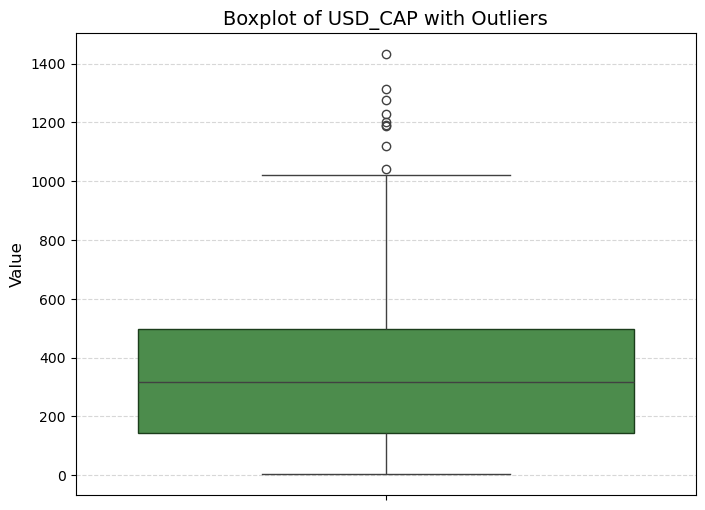

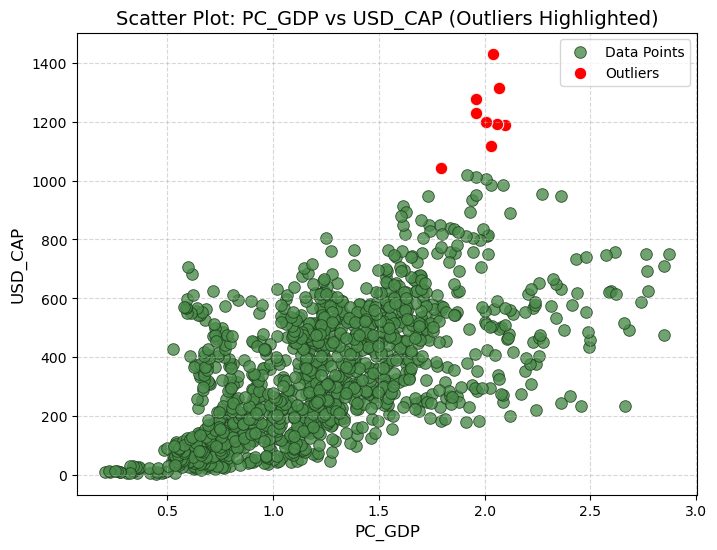

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = r"C:\Users\kaurp\Team_2_Pharmaceutical_Drug_Spending_by_Countries\flat-ui__data-Tue Mar 11 2025.csv"
data = pd.read_csv(file_path)

# Detect Outliers Using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify Outliers
outliers = detect_outliers_iqr(data, 'USD_CAP')  # Replace 'USD_CAP' with your desired column
print("Outliers detected:")
print(outliers)

# ✅ Visualization - Boxplot with consistent green color scheme
plt.figure(figsize=(8, 6))
box_color = '#4c8c4c'   # Mid-tone green for box fill
border_color = '#1b3d1b'  # Dark green for edges
whisker_color = '#2a512a'  # Complementary green for whiskers
median_color = '#88c888'   # Lighter green for median line

# Create the boxplot
box = sns.boxplot(data=data, y='USD_CAP', color=box_color)

# Customize elements
for patch in box.patches:
    patch.set_facecolor(box_color)
    patch.set_edgecolor(border_color)

# Styling
plt.title('Boxplot of USD_CAP with Outliers', fontsize=14)
plt.ylabel('Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Subtle gridlines
plt.show()

# ✅ Visualization - Scatter Plot with consistent green color scheme
plt.figure(figsize=(8, 6))

# Green color for data points and red for outliers
sns.scatterplot(x=data['PC_GDP'], y=data['USD_CAP'], label='Data Points', 
                color='#4c8c4c', edgecolor='#1b3d1b', alpha=0.8, s=70)

# Highlight outliers in red
sns.scatterplot(x=outliers['PC_GDP'], y=outliers['USD_CAP'], color='red', label='Outliers', s=80)

# Styling
plt.title('Scatter Plot: PC_GDP vs USD_CAP (Outliers Highlighted)', fontsize=14)
plt.xlabel('PC_GDP', fontsize=12)
plt.ylabel('USD_CAP', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


We are using the detect_outliers_iqr to computes the IQR for the specified column (USD_CAP in this case). Outliers are identified as data points falling outside the range defined by 1.5 * IQR from the Q1 (25th percentile) and Q3 (75th percentile). The function returns the rows that are outliers based on the IQR method. The outliers variable stores the rows in data where the USD_CAP values fall outside the IQR range. This identifies data points that deviate significantly from the norm, ensuring accurate analysis by eliminating skewed results.
For Visualization, A boxplot is plotted to show the distribution of the USD_CAP values. The boxplot helps to visualize the spread, median, and any potential outliers in the USD_CAP data and also scatter plot is created to visualize the relationship between PC_GDP (x-axis) and USD_CAP (y-axis). The regular data points are shown in the scatter plot, while the detected outliers are highlighted in red.

Key Observations: 
Boxplot of USD_CAP with Outliers:
 The boxplot shows the distribution of USD_CAP with a clear indication of outliers.
 The interquartile range (IQR)( Q3-Q1) is relatively compact, suggesting that most data points are clustered around the median.
 Outliers are visible above the upper whisker, indicating unusually high USD_CAP values that deviate significantly from the rest of the data.
Scatter Plot: PC_GDP vs USD_CAP (Outliers Highlighted):
 The scatter plot reveals a general positive trend between PC_GDP and USD_CAP, indicating that higher GDP per capita is associated with higher capital expenditure.
 Outliers, highlighted in red, are primarily concentrated at higher PC_GDP values (around 1.5 to 2.0), with significantly higher USD_CAP values compared to the rest of the data.
 These outliers correspond to specific years and locations (e.g., USA in recent years), suggesting unique economic conditions or policies that result in exceptionally high capital expenditure.